# Red Wine Linear Regression – Tier 3 Case Study

## 🍷 Project Overview
In this project, I'm exploring a dataset of red wines to understand which chemical properties are most strongly associated with alcohol content. The goal is to build a **linear regression model** that can help predict a wine’s alcohol percentage based on its features like acidity, sugar, density, and more.

## 🎯 Objective
- Predict the **alcohol content** of red wine using other available chemical attributes.
- Use **exploratory data analysis (EDA)** to understand patterns in the data.
- Build and evaluate a **linear regression model**.
- Interpret which features are most influential in predicting alcohol content.



In this step, I explored the dataset to understand the structure of the data, identify any missing or unusual values, and prepare the data for modeling. I also renamed some columns for easier access and removed unnecessary ones like the index column.

In [2]:
# Load basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("wineQualityReds.csv")

# Drop the unnamed index column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Preview the dataset
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1599, 12)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check for missing values
print("\nMissing values:\n")
print(df.isnull().sum())

# Check data types
print("\nData types:\n")
print(df.dtypes)

# Summary statistics
df.describe()


Missing values:

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data types:

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Step 3: Exploratory Data Analysis (EDA)

In this step, I explored the data visually and statistically to understand how each feature relates to the alcohol content of the red wine. I looked at correlation values and created visualizations to identify strong predictors for the regression model.

Correlation with alcohol:
 alcohol                 1.000000
quality                 0.476166
pH                      0.205633
citric.acid             0.109903
sulphates               0.093595
residual.sugar          0.042075
fixed.acidity          -0.061668
free.sulfur.dioxide    -0.069408
volatile.acidity       -0.202288
total.sulfur.dioxide   -0.205654
chlorides              -0.221141
density                -0.496180
Name: alcohol, dtype: float64


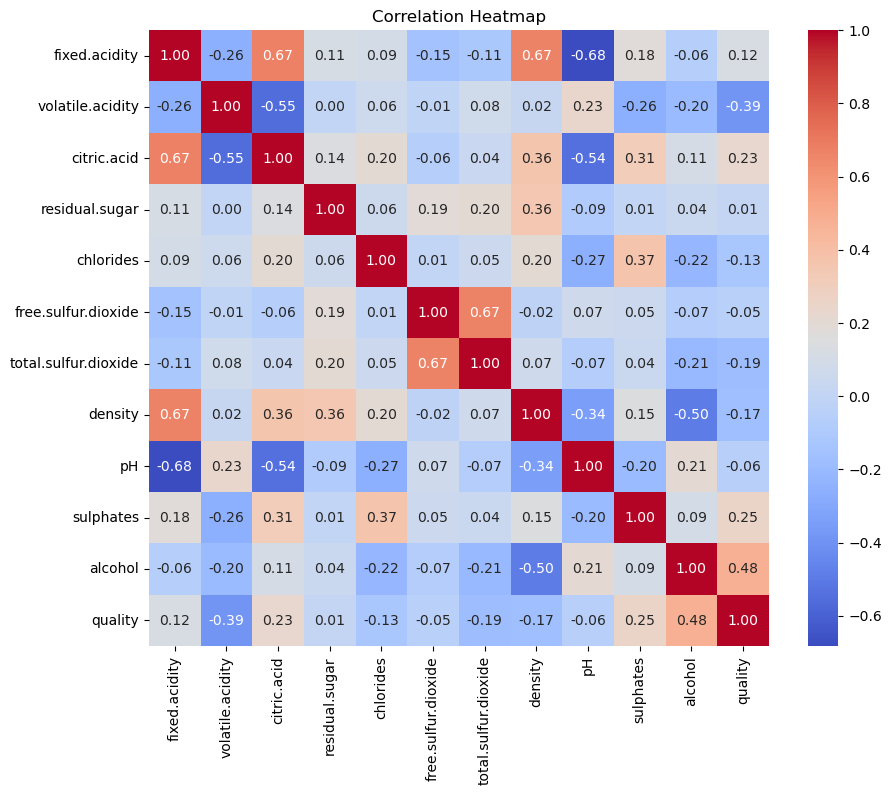

In [6]:
# Calculate correlations with alcohol
correlation = df.corr()['alcohol'].sort_values(ascending=False)
print("Correlation with alcohol:\n", correlation)

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Step 4: Linear Regression Modeling

In this step, I built a linear regression model to predict the alcohol content of red wine using the chemical features in the dataset. Based on the EDA, I focused on features that had the strongest relationships with alcohol, such as density and sulphates.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Choose features to use in the model (you can try adding more later)
features = ['density', 'sulphates', 'citric.acid']
X = df[features]
y = df['alcohol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.42529218671287816
RMSE: 0.8458545503917247


## Step 5: Model Evaluation & Interpretation

After training the linear regression model, I evaluated its performance using two metrics: **R² score** and **RMSE (Root Mean Squared Error)**.

### 📊 Results:
- **R² Score:** 0.425  
  This means the model explains about **42.5% of the variation** in alcohol content. It found some patterns in the data, but there’s still more that it couldn't capture.

- **RMSE:** 0.85  
  On average, the model’s predictions are off by about **0.85% alcohol**, which is a reasonable margin considering wine alcohol levels usually range between 8% and 15%.

### 📌 Interpretation:
The model is not perfect, but it does a decent job of predicting alcohol content using features like **density**, **sulphates**, and **citric acid**. The results show that:
- **Density** is the strongest predictor (more alcohol = lower density)
- **Sulphates** and **citric acid** have small positive relationships with alcohol

There’s room to improve the model — possibly by adding more features or trying other regression techniques — but this is a good start.

## Step 6: Final Conclusion

This project gave me a hands-on look at how to use linear regression to model a real-world problem. I worked with red wine data to figure out which chemical features are most related to alcohol content, and then built a model to predict it.

Even though the model isn't perfect, it did a decent job — explaining about 42% of the variation in alcohol levels. The results made sense too: wines with lower density and higher sulphates generally had more alcohol.

If I wanted to improve the model, I’d probably try adding more features, testing different modeling techniques, or even looking at interactions between variables. But overall, this was a great exercise in applying linear regression and seeing how small changes in features can help predict something useful.
